### Customer Segmentation (30 marks)

In this segment, we will try to segment the customers based on various features and later will try to profile the segments, which we will be presenting to the FREECELL team.

To perfrom KMean Clustering, we will not be using all the columns. According to the marketing team they wanted to target customers based on the number of calls made by the customer. Accodingly they may create plans and offers that will help them to launch themselves in the market.


1. Data Preparation (4 marks)
    - Filter the data and keep only the following columns: total day calls, total night calls, total eve calls, total intl calls (4 marks)
    - Perfrom Min-Max scaling on the data

2. Performing KMeans (16 marks)
    - Check Silhouette Curve (4 marks)
    - Check Elbow Curve (4 marks)
    - Run KMeans with final value of K (4 marks)
    - Assign the labels back to the original data
    - Plot scatter plot to visulize the clusters (4 marks)

3. Cluster Profiling (10 marks)
    - Check the average of various features to understand the properties of various groups
    - Write your inferences using the results generated. (10 marks)
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the file

cluster = pd.read_csv(r"telcom.csv")

# Check top-5 rows
cluster.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Analysis-1.1
# Filter the cluster dataframe and keep only the following columns: total day calls, total night calls, total eve calls, total intl calls
# The filtered data frame should only have 4 columns as mentioned above

# Write your code here
# Hint: https://stackoverflow.com/a/48198034
cluster.drop(['state','area code','phone number','account length','total intl charge','international plan','voice mail plan','number vmail messages','total day minutes','total night minutes','total night charge','total intl minutes','customer service calls','churn'], axis='columns', inplace=True)
cluster.drop(['total day charge','total eve minutes'], axis='columns', inplace=True)
cluster.drop(['total eve charge'], axis='columns', inplace=True)

In [4]:
cluster.head()

,total day calls,total eve calls,total night calls,total intl calls
0,110,99,91,3
1,123,103,103,3
2,114,110,104,5
3,71,88,89,7
4,113,122,121,3


In [5]:
# Analysis-1.2
# Here we need to scale the cluster data as created in the previous step
# We will be using min-max scaler
# You are not required to write any code over here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cluster_scale = scaler.fit_transform(cluster)

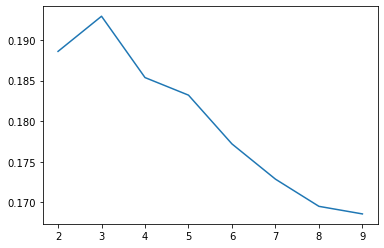

In [6]:
# Analysis-2.1
# Here you need to check the silhouette curve
# Here you don't need to write any code
# Mention your inference about the plot

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(cluster_scale)
    sse_.append([k, silhouette_score(cluster_scale, kmeans.labels_)])
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

- **Explain the above generate plot**
- **Exlain what is silhouette score and how it's useful in the KMean process?**

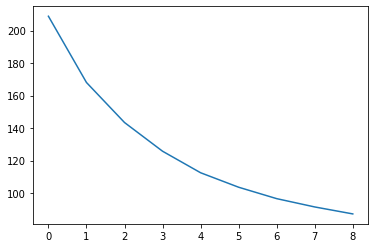

In [7]:
# Analysis-2.2
# Here you need to check the elbow curve
# Here you don't need to write any code
# Mention your inference about the plot

ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters)
    model_clus.fit(cluster_scale)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

- **Explain the above generate plot**
- **Exlain what is Elbow Curve and how it's useful in the KMean process?**

In [12]:
# Analysis-2.3
# Here we need to run the final KMean clustering based on the value of K as chosen by you

# Write your code here
# use random_state=0
# Use the data "cluster_scale"
from sklearn.cluster import KMeans
cluster_scale=KMeans(n_clusters=3,verbose=2,random_state=0)

In [20]:
# Analysis-2.4
# Here we will be assigning the labels generated through k-mean clustering to the original dataframe: 'cluster'
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
kmeans.fit(cluster)
kmeans.labels_[:5]
cluster['labels'] = kmeans.labels_

<AxesSubplot:xlabel='total night calls', ylabel='total intl calls'>

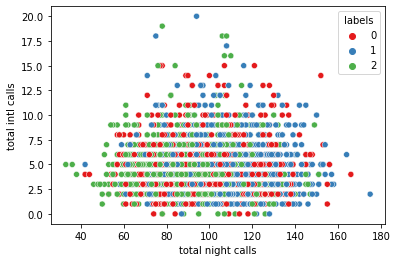

In [21]:
# Analysis-2.5
# Here we need to visulize the cluster as formed by the algorithm
sns.scatterplot(x='total night calls',y='total intl calls',hue='labels',legend='full',data= cluster, palette = 'Set1')

# Write your inferences about the plot generated

**Explain the plot**

In [22]:
# Analysis-3.1
# Here we will be checking the cluster mean for various cluster generated
cluster.groupby('labels').mean()

,total day calls,total eve calls,total night calls,total intl calls
labels,,,,
0,85.243902,84.944653,98.510319,4.499062
1,95.348206,118.413823,106.857393,4.519685
2,120.016904,95.892349,94.758897,4.419929
